In [164]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf

In [165]:
yf.pdr_override() # <== that's all it takes :-)
stock = pdr.get_data_yahoo('MDB', 
                          start=datetime.datetime(2018, 10, 1), 
                          end=datetime.datetime(2019, 3, 1))
stock.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-10-01,81.51,82.10,78.51,78.86,78.86,720200
2018-10-02,75.24,76.75,74.02,76.11,76.11,1624500
2018-10-03,76.01,76.83,74.60,76.20,76.20,801800
2018-10-04,75.66,76.40,72.02,73.95,73.95,1067200
2018-10-05,72.96,74.88,70.81,72.75,72.75,829200


In [166]:
# Inspect the index 
stock.index

# Inspect the columns
stock.columns

# Select only the last 10 observations of `Close`
ts = stock['Close'][-10:]

# Check the type of `ts` 
type(ts)

pandas.core.series.Series

In [167]:
# Inspect the first rows of November-December 18
print(stock.loc[pd.Timestamp('2018-11-01'):pd.Timestamp('2018-12-31')].head())

# Inspect the first rows of 2019 
print(stock.loc['2019'].head())


             Open   High    Low  Close  Adj Close   Volume
Date                                                      
2018-11-01  81.50  81.99  77.63  80.91      80.91  1068100
2018-11-02  80.50  81.22  79.24  79.69      79.69   781600
2018-11-05  79.56  79.56  75.90  78.13      78.13   730400
2018-11-06  77.96  80.00  75.64  76.06      76.06   672400
2018-11-07  78.89  84.03  78.00  82.10      82.10  1500800
             Open   High    Low  Close  Adj Close   Volume
Date                                                      
2019-01-02  81.40  82.58  78.11  79.95      79.95  1325100
2019-01-03  77.70  79.50  75.00  75.89      75.89  1157800
2019-01-04  77.85  83.89  77.29  81.73      81.73  1214700
2019-01-07  83.05  89.20  82.75  85.70      85.70  1158900
2019-01-08  88.00  90.59  85.08  89.99      89.99  1414200


In [168]:
# Sample 20 rows
sample = stock.sample(20)

# Print `sample`
print(sample)

# Resample to monthly level 
monthly_stock = stock.resample('M')

# Print `monthly_aapl`
print(monthly_stock)

             Open   High    Low  Close  Adj Close   Volume
Date                                                      
2018-10-16  66.23  71.32  65.36  70.30      70.30  1131500
2018-10-09  70.12  71.17  66.87  68.17      68.17  1260000
2018-10-01  81.51  82.10  78.51  78.86      78.86   720200
2019-01-02  81.40  82.58  78.11  79.95      79.95  1325100
2018-10-12  66.00  67.00  63.92  64.69      64.69  1071500
2018-12-27  77.78  83.41  77.00  82.29      82.29   851100
2018-11-27  79.09  80.64  78.64  79.55      79.55   559600
2019-01-25  84.90  87.09  83.30  86.90      86.90   808500
2019-01-28  84.35  88.85  84.13  88.39      88.39   786700
2019-01-24  83.82  84.87  83.25  84.27      84.27   671400
2018-10-18  69.61  70.24  67.30  68.79      68.79   891500
2018-11-30  83.34  84.95  79.32  82.90      82.90  1745000
2019-01-08  88.00  90.59  85.08  89.99      89.99  1414200
2018-12-12  86.76  92.76  86.76  89.06      89.06  1403600
2018-10-03  76.01  76.83  74.60  76.20      76.20   8018

In [169]:
# Add a column `diff` to `aapl` 
stock['diff'] = stock.Open - stock.Close

# Delete the new `diff` column
del stock['diff']

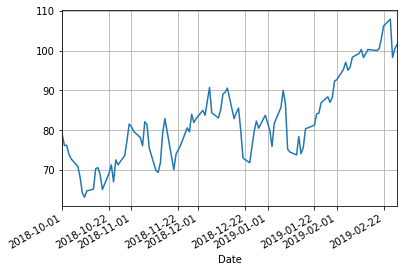

In [170]:
# Import Matplotlib's `pyplot` module as `plt`
import matplotlib.pyplot as plt

# Plot the closing prices for `aapl`
stock['Close'].plot(grid=True)

# Show the plot
plt.show()

# Common Financial Analysis

## Returns

In [171]:
# Assign `Adj Close` to `daily_close`
daily_close = stock[['Adj Close']]

# Daily returns
daily_pct_c = daily_close.pct_change()

# Replace NA values with 0
daily_pct_c.fillna(0, inplace=True)

# Inspect daily returns
print(daily_pct_c)

# Daily log returns
daily_log_returns = np.log(daily_close.pct_change()+1)

# Print daily log returns
print(daily_log_returns)

            Adj Close
Date                 
2018-10-01   0.000000
2018-10-02  -0.034872
2018-10-03   0.001182
2018-10-04  -0.029528
2018-10-05  -0.016227
2018-10-08  -0.025979
2018-10-09  -0.037962
2018-10-10  -0.058237
2018-10-11  -0.017134
2018-10-12   0.025198
2018-10-15   0.006956
2018-10-16   0.079214
2018-10-17   0.003272
2018-10-18  -0.024670
2018-10-19  -0.054514
2018-10-22   0.063038
2018-10-23   0.030662
2018-10-24  -0.059921
2018-10-25   0.082550
2018-10-26  -0.017375
2018-10-29   0.032837
2018-10-30   0.050136
2018-10-31   0.054470
2018-11-01  -0.007239
2018-11-02  -0.015078
2018-11-05  -0.019576
2018-11-06  -0.026494
2018-11-07   0.079411
2018-11-08  -0.009135
2018-11-09  -0.072895
...               ...
2019-01-16  -0.055485
2019-01-17   0.020932
2019-01-18   0.062698
2019-01-22   0.011078
2019-01-23   0.035209
2019-01-24   0.002141
2019-01-25   0.031209
2019-01-28   0.017146
2019-01-29  -0.015839
2019-01-30   0.013795
2019-01-31   0.047284
2019-02-01   0.003356
2019-02-04

In [172]:
# Resample `stock` to business months, take last observation as value 
monthly = stock.resample('BM').apply(lambda x: x[-1])

# Calculate the monthly percentage change
monthly.pct_change()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-10-31,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-30,0.054003,0.005325,0.003162,0.017178,0.017178,0.051395
2018-12-31,-0.016199,0.012360,0.033661,0.010133,0.010133,-0.235759
2019-01-31,0.079400,0.076977,0.077083,0.102938,0.102938,-0.224880
2019-02-28,0.135254,0.125891,0.134073,0.099610,0.099610,-0.184096


In [173]:
# Resample `stock` to quarters, take the mean as value per quarter
quarter = stock.resample("4M").mean()

# Calculate the quarterly percentage change
quarter.pct_change()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-10-31,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-28,0.199231,0.200975,0.203105,0.202619,0.202619,0.131957


In [174]:
# Daily returns
daily_pct_c = daily_close / daily_close.shift(1) - 1

# Print `daily_pct_c`
print(daily_pct_c)


            Adj Close
Date                 
2018-10-01        NaN
2018-10-02  -0.034872
2018-10-03   0.001182
2018-10-04  -0.029528
2018-10-05  -0.016227
2018-10-08  -0.025979
2018-10-09  -0.037962
2018-10-10  -0.058237
2018-10-11  -0.017134
2018-10-12   0.025198
2018-10-15   0.006956
2018-10-16   0.079214
2018-10-17   0.003272
2018-10-18  -0.024670
2018-10-19  -0.054514
2018-10-22   0.063038
2018-10-23   0.030662
2018-10-24  -0.059921
2018-10-25   0.082550
2018-10-26  -0.017375
2018-10-29   0.032837
2018-10-30   0.050136
2018-10-31   0.054470
2018-11-01  -0.007239
2018-11-02  -0.015078
2018-11-05  -0.019576
2018-11-06  -0.026494
2018-11-07   0.079411
2018-11-08  -0.009135
2018-11-09  -0.072895
...               ...
2019-01-16  -0.055485
2019-01-17   0.020932
2019-01-18   0.062698
2019-01-22   0.011078
2019-01-23   0.035209
2019-01-24   0.002141
2019-01-25   0.031209
2019-01-28   0.017146
2019-01-29  -0.015839
2019-01-30   0.013795
2019-01-31   0.047284
2019-02-01   0.003356
2019-02-04

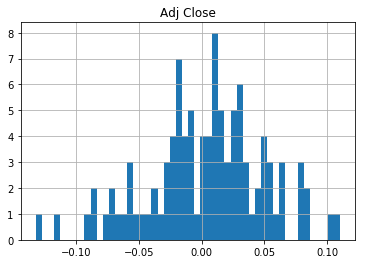

        Adj Close
count  102.000000
mean     0.003547
std      0.046139
min     -0.131840
25%     -0.020516
50%      0.008986
75%      0.031073
max      0.110198


In [175]:
# Import matplotlib
import matplotlib.pyplot as plt

# Plot the distribution of `daily_pct_c`
daily_pct_c.hist(bins=50)

# Show the plot
plt.show()

# Pull up summary statistics
print(daily_pct_c.describe())


In [176]:
# Calculate the cumulative daily returns
cum_daily_return = (1 + daily_pct_c).cumprod()

# Print `cum_daily_return`
print(cum_daily_return)

            Adj Close
Date                 
2018-10-01        NaN
2018-10-02   0.965128
2018-10-03   0.966269
2018-10-04   0.937738
2018-10-05   0.922521
2018-10-08   0.898554
2018-10-09   0.864443
2018-10-10   0.814101
2018-10-11   0.800152
2018-10-12   0.820314
2018-10-15   0.826021
2018-10-16   0.891453
2018-10-17   0.894370
2018-10-18   0.872305
2018-10-19   0.824753
2018-10-22   0.876744
2018-10-23   0.903627
2018-10-24   0.849480
2018-10-25   0.919604
2018-10-26   0.903627
2018-10-29   0.933300
2018-10-30   0.980091
2018-10-31   1.033477
2018-11-01   1.025995
2018-11-02   1.010525
2018-11-05   0.990743
2018-11-06   0.964494
2018-11-07   1.041085
2018-11-08   1.031575
2018-11-09   0.956378
...               ...
2019-01-16   0.939006
2019-01-17   0.958661
2019-01-18   1.018767
2019-01-22   1.030053
2019-01-23   1.066320
2019-01-24   1.068603
2019-01-25   1.101953
2019-01-28   1.120847
2019-01-29   1.103094
2019-01-30   1.118311
2019-01-31   1.171189
2019-02-01   1.175120
2019-02-04

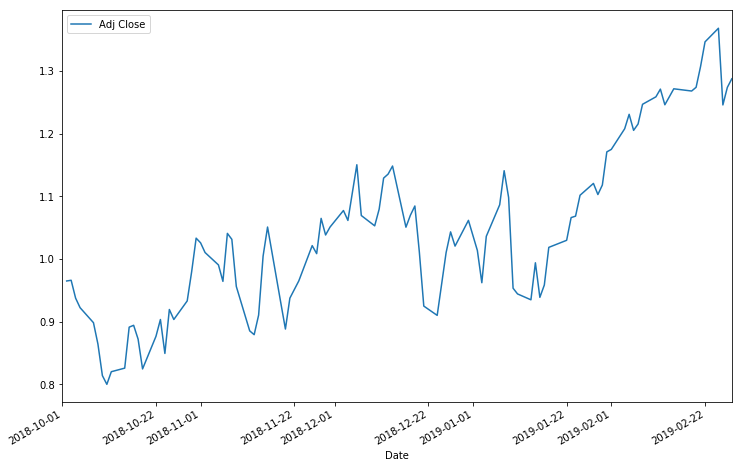

In [177]:
# Import matplotlib
import matplotlib.pyplot as plt 

# Plot the cumulative daily returns
cum_daily_return.plot(figsize=(12,8))

# Show the plot
plt.show()

In [178]:
# Resample the cumulative daily return to cumulative monthly return 
cum_monthly_return = cum_daily_return.resample("M").mean()

# Print the `cum_monthly_return`
print(cum_monthly_return)

            Adj Close
Date                 
2018-10-31   0.895367
2018-11-30   0.983708
2018-12-31   1.057664
2019-01-31   1.041092
2019-02-28   1.261269


In [222]:
yf.pdr_override() # <== that's all it takes :-)



stock_data = yf.download("SPY AAPL MDB", start="2017-10-01", end="2019-03-01",
                   group_by="ticker")

[*********************100%***********************]  3 of 3 downloaded


In [223]:
stock_data.columns

MultiIndex(levels=[['MDB', 'SPY', 'AAPL'], ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']],
           codes=[[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2], [0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5]])

In [224]:
stock_data.head()


MDB                                     SPY                  \
           Open High Low Close Adj Close Volume    Open    High     Low   
Date                                                                      
2017-10-02  NaN  NaN NaN   NaN       NaN    NaN  251.49  252.32  251.29   
2017-10-03  NaN  NaN NaN   NaN       NaN    NaN  252.32  252.89  252.23   
2017-10-04  NaN  NaN NaN   NaN       NaN    NaN  252.69  253.44  252.56   
2017-10-05  NaN  NaN NaN   NaN       NaN    NaN  253.54  254.68  253.20   
2017-10-06  NaN  NaN NaN   NaN       NaN    NaN  254.15  254.70  253.85   

                                          AAPL                          \
             Close Adj Close    Volume    Open    High     Low   Close   
Date                                                                     
2017-10-02  252.32    245.28  59023000  154.26  154.45  152.72  153.81   
2017-10-03  252.86    245.80  66810200  154.01  155.09  153.91  154.48   
2017-10-04  253.16    246.09  55953600  153.63  153.86  152.46  153.48   
2017-10-05  254.66    247.55  63522800  154.18  155.44  154.05  155.39   
2017-10-06  254.37    247.27  80646000  154.97  155.49  154.56  155.30   

                                
           Adj Close    Volume  
Date                            
2017-10-02    149.77  18698800  
2017-10-03    150.42  16230300  
2017-10-04    149.45  20163800  
2017-10-05    151.31  21283800  
2017-10-06    151.22  17407600

In [225]:
stock_data = stock_data.reset_index()

stock_data.head()

Date  MDB                                     SPY                  \
             Open High Low Close Adj Close Volume    Open    High     Low   
0 2017-10-02  NaN  NaN NaN   NaN       NaN    NaN  251.49  252.32  251.29   
1 2017-10-03  NaN  NaN NaN   NaN       NaN    NaN  252.32  252.89  252.23   
2 2017-10-04  NaN  NaN NaN   NaN       NaN    NaN  252.69  253.44  252.56   
3 2017-10-05  NaN  NaN NaN   NaN       NaN    NaN  253.54  254.68  253.20   
4 2017-10-06  NaN  NaN NaN   NaN       NaN    NaN  254.15  254.70  253.85   

                                 AAPL                                    \
    Close Adj Close    Volume    Open    High     Low   Close Adj Close   
0  252.32    245.28  59023000  154.26  154.45  152.72  153.81    149.77   
1  252.86    245.80  66810200  154.01  155.09  153.91  154.48    150.42   
2  253.16    246.09  55953600  153.63  153.86  152.46  153.48    149.45   
3  254.66    247.55  63522800  154.18  155.44  154.05  155.39    151.31   
4  254.37    247.27  80646000  154.97  155.49  154.56  155.30    151.22   

             
     Volume  
0  18698800  
1  16230300  
2  20163800  
3  21283800  
4  17407600

In [226]:
print(list(stock_data.columns.levels[0]))
print(list(stock_data.columns.levels[1]))
stock_data.columns.levels[0]

['MDB', 'SPY', 'AAPL', 'Date']
['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', '']


Index(['MDB', 'SPY', 'AAPL', 'Date'], dtype='object')

In [227]:
index = stock_data.loc[:, stock_data.columns.get_level_values(1)==''].columns.tolist()
values = stock_data.loc[:, stock_data.columns.get_level_values(1)=='Adj Close'].columns.tolist()
stock_unpivot = stock_data.melt(id_vars=index, value_vars=values, 
                                var_name ='Stock', value_name ='Adj Close')

stock_unpivot.columns = ['Date', 'Ticker', 'Adj Close']

print(stock_unpivot)

           Date Ticker  Adj Close
0    2017-10-02    MDB        NaN
1    2017-10-03    MDB        NaN
2    2017-10-04    MDB        NaN
3    2017-10-05    MDB        NaN
4    2017-10-06    MDB        NaN
5    2017-10-09    MDB        NaN
6    2017-10-10    MDB        NaN
7    2017-10-11    MDB        NaN
8    2017-10-12    MDB        NaN
9    2017-10-13    MDB        NaN
10   2017-10-16    MDB        NaN
11   2017-10-17    MDB        NaN
12   2017-10-18    MDB        NaN
13   2017-10-19    MDB      32.07
14   2017-10-20    MDB      30.68
15   2017-10-23    MDB      30.50
16   2017-10-24    MDB      30.57
17   2017-10-25    MDB      31.00
18   2017-10-26    MDB      31.10
19   2017-10-27    MDB      30.89
20   2017-10-30    MDB      29.85
21   2017-10-31    MDB      30.48
22   2017-11-01    MDB      29.80
23   2017-11-02    MDB      29.95
24   2017-11-03    MDB      29.63
25   2017-11-06    MDB      30.61
26   2017-11-07    MDB      29.81
27   2017-11-08    MDB      29.88
28   2017-11-0

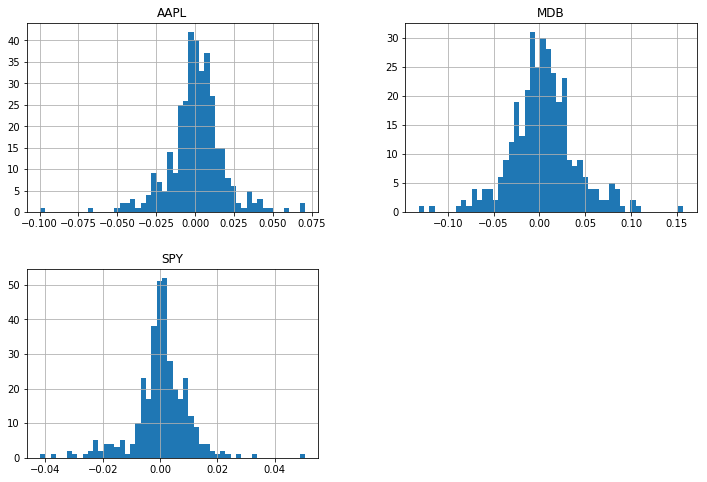

In [228]:
daily_close_px = stock_unpivot.reset_index()
daily_close_pivot = daily_close_px.pivot('Date', 'Ticker', 'Adj Close')

# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_pivot.pct_change()


# Plot the distributions
daily_pct_change.hist(bins=50, figsize=(12,8))

# Show the resulting plot
plt.show()

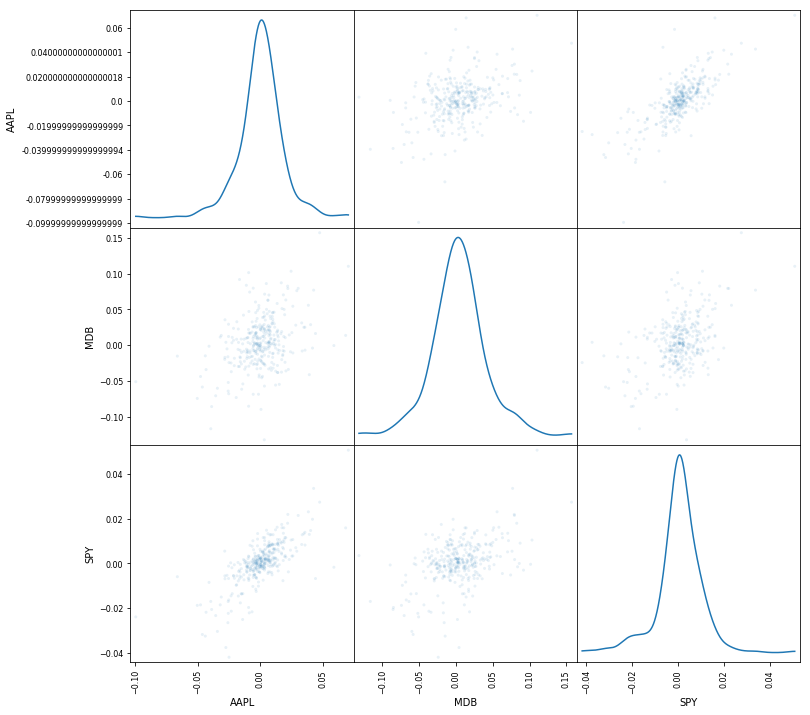

In [229]:
# Plot a scatter matrix with the `daily_pct_change` data 
pd.plotting.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(12,12))

# Show the plot
plt.show()

## Moving Windows

In [230]:
mdb = stock_unpivot[stock_unpivot['Ticker'] == 'MDB']

# Isolate the adjusted closing prices 
adj_close_px = mdb['Adj Close']

# Calculate the moving average
moving_avg = adj_close_px.rolling(window=40).mean()

# Inspect the result
moving_avg[-10:]


344    85.40550
345    85.80325
346    86.16500
347    86.68300
348    87.43700
349    88.29775
350    89.00350
351    89.40300
352    89.90250
353    90.34800
Name: Adj Close, dtype: float64

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


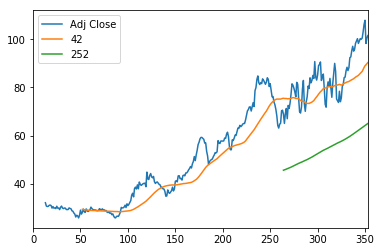

In [231]:
# Short moving window rolling mean
mdb['42'] = adj_close_px.rolling(window=40).mean()

# Long moving window rolling mean
mdb['252'] = adj_close_px.rolling(window=252).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
mdb[['Adj Close', '42', '252']].plot()

plt.show()

## Volatility Calculation

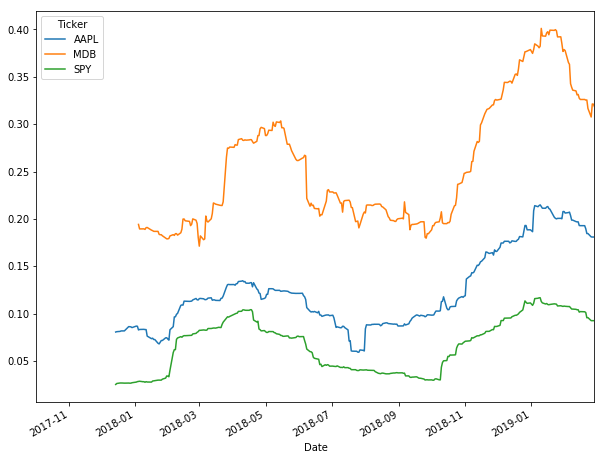

In [234]:
# Define the minumum of periods to consider 
min_periods = 52

# Calculate the volatility
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
vol.plot(figsize=(10, 8))

# Show the plot
plt.show()